### 1. Load and clean data

In [175]:
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,classification_report


In [89]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [90]:
columns_with_zero = (df==0).any().sum()
print(columns_with_zero)

7


In [91]:
columns_zero_values = df.columns[(df==0).any()]
print(columns_zero_values)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')


### 2. univariate Analysis

[]

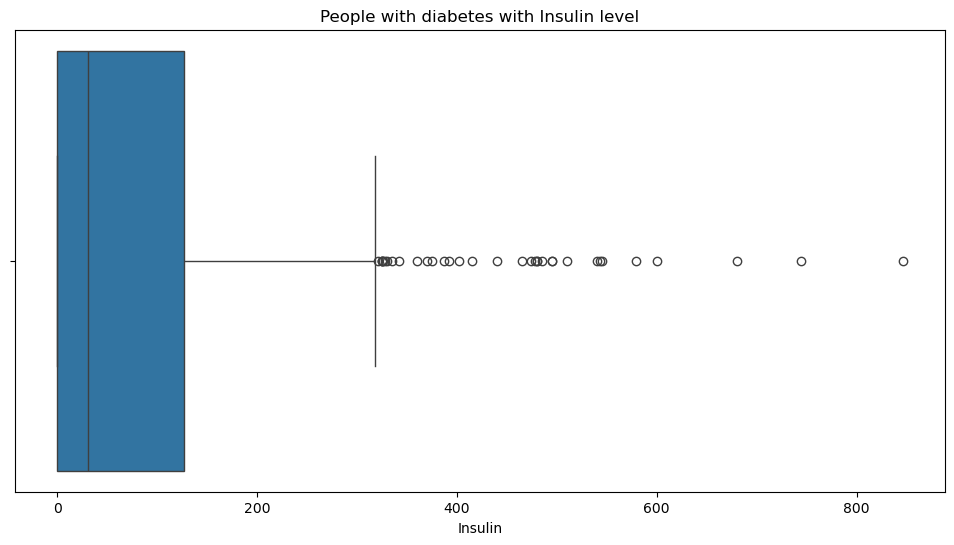

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Insulin'])
plt.title('People with diabetes with Insulin level')
plt.plot()

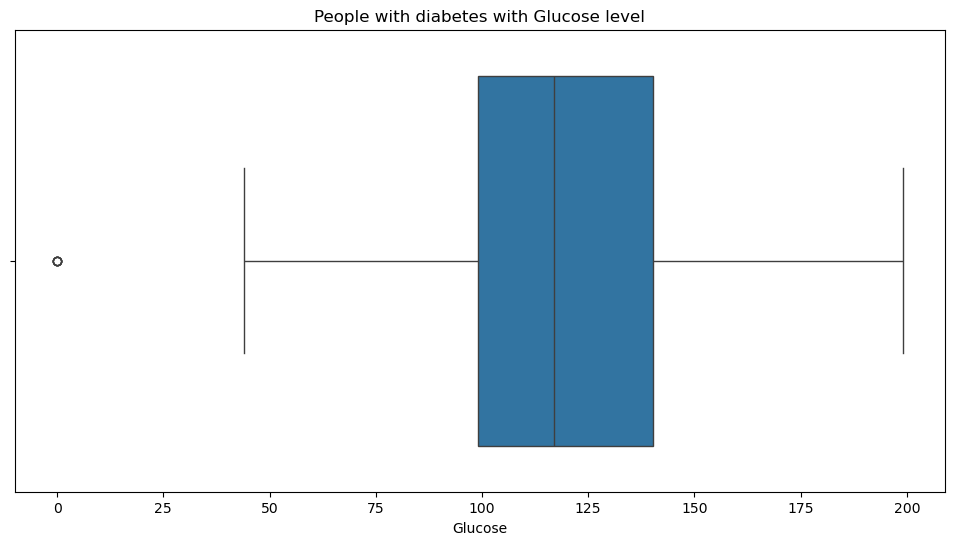

In [94]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Glucose'])
plt.title('People with diabetes with Glucose level')
plt.show()

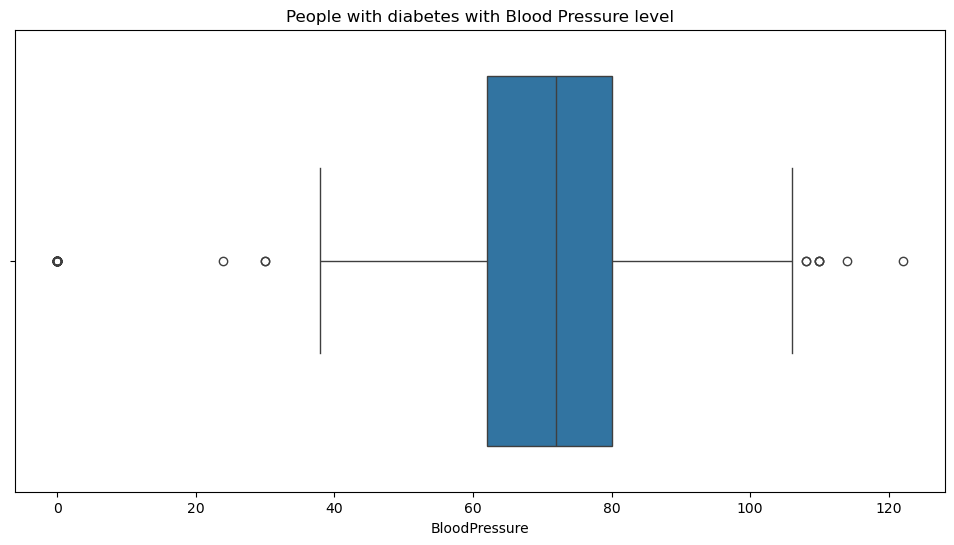

In [95]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['BloodPressure'])
plt.title('People with diabetes with Blood Pressure level')
plt.show()

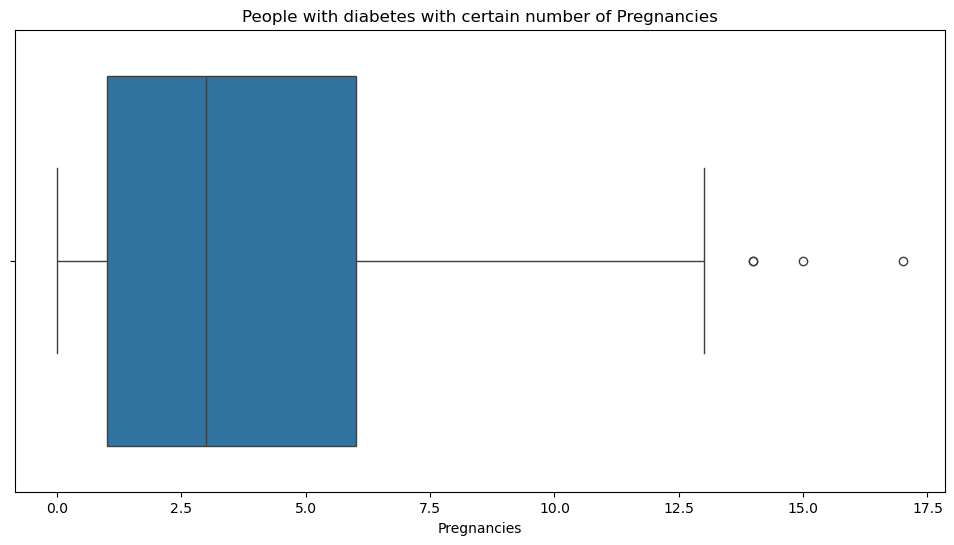

In [96]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Pregnancies'])
plt.title('People with diabetes with certain number of Pregnancies')
plt.show()

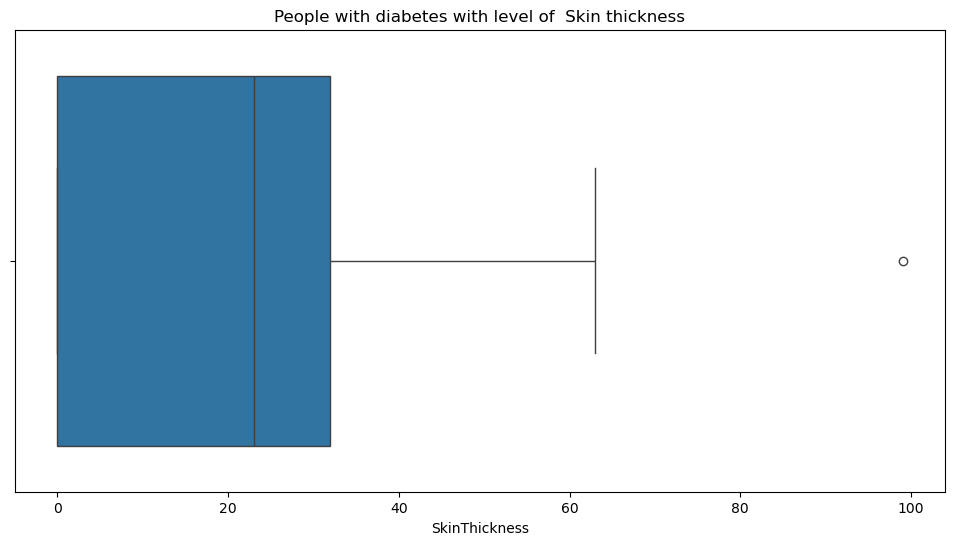

In [97]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['SkinThickness'])
plt.title('People with diabetes with level of  Skin thickness')
plt.show()

In [98]:
columns_median = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for col in columns_median:
    for label in df['Outcome']:
        median_val = df.loc[(df[col]!=0) & (df['Outcome']==label),col].median()
        df.loc[(df[col]==0)& (df['Outcome']==label)] == median_val

In [99]:
count_zerovalcol=df.columns[(df==0).any()]
print(count_zerovalcol)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')


<Figure size 1200x800 with 0 Axes>

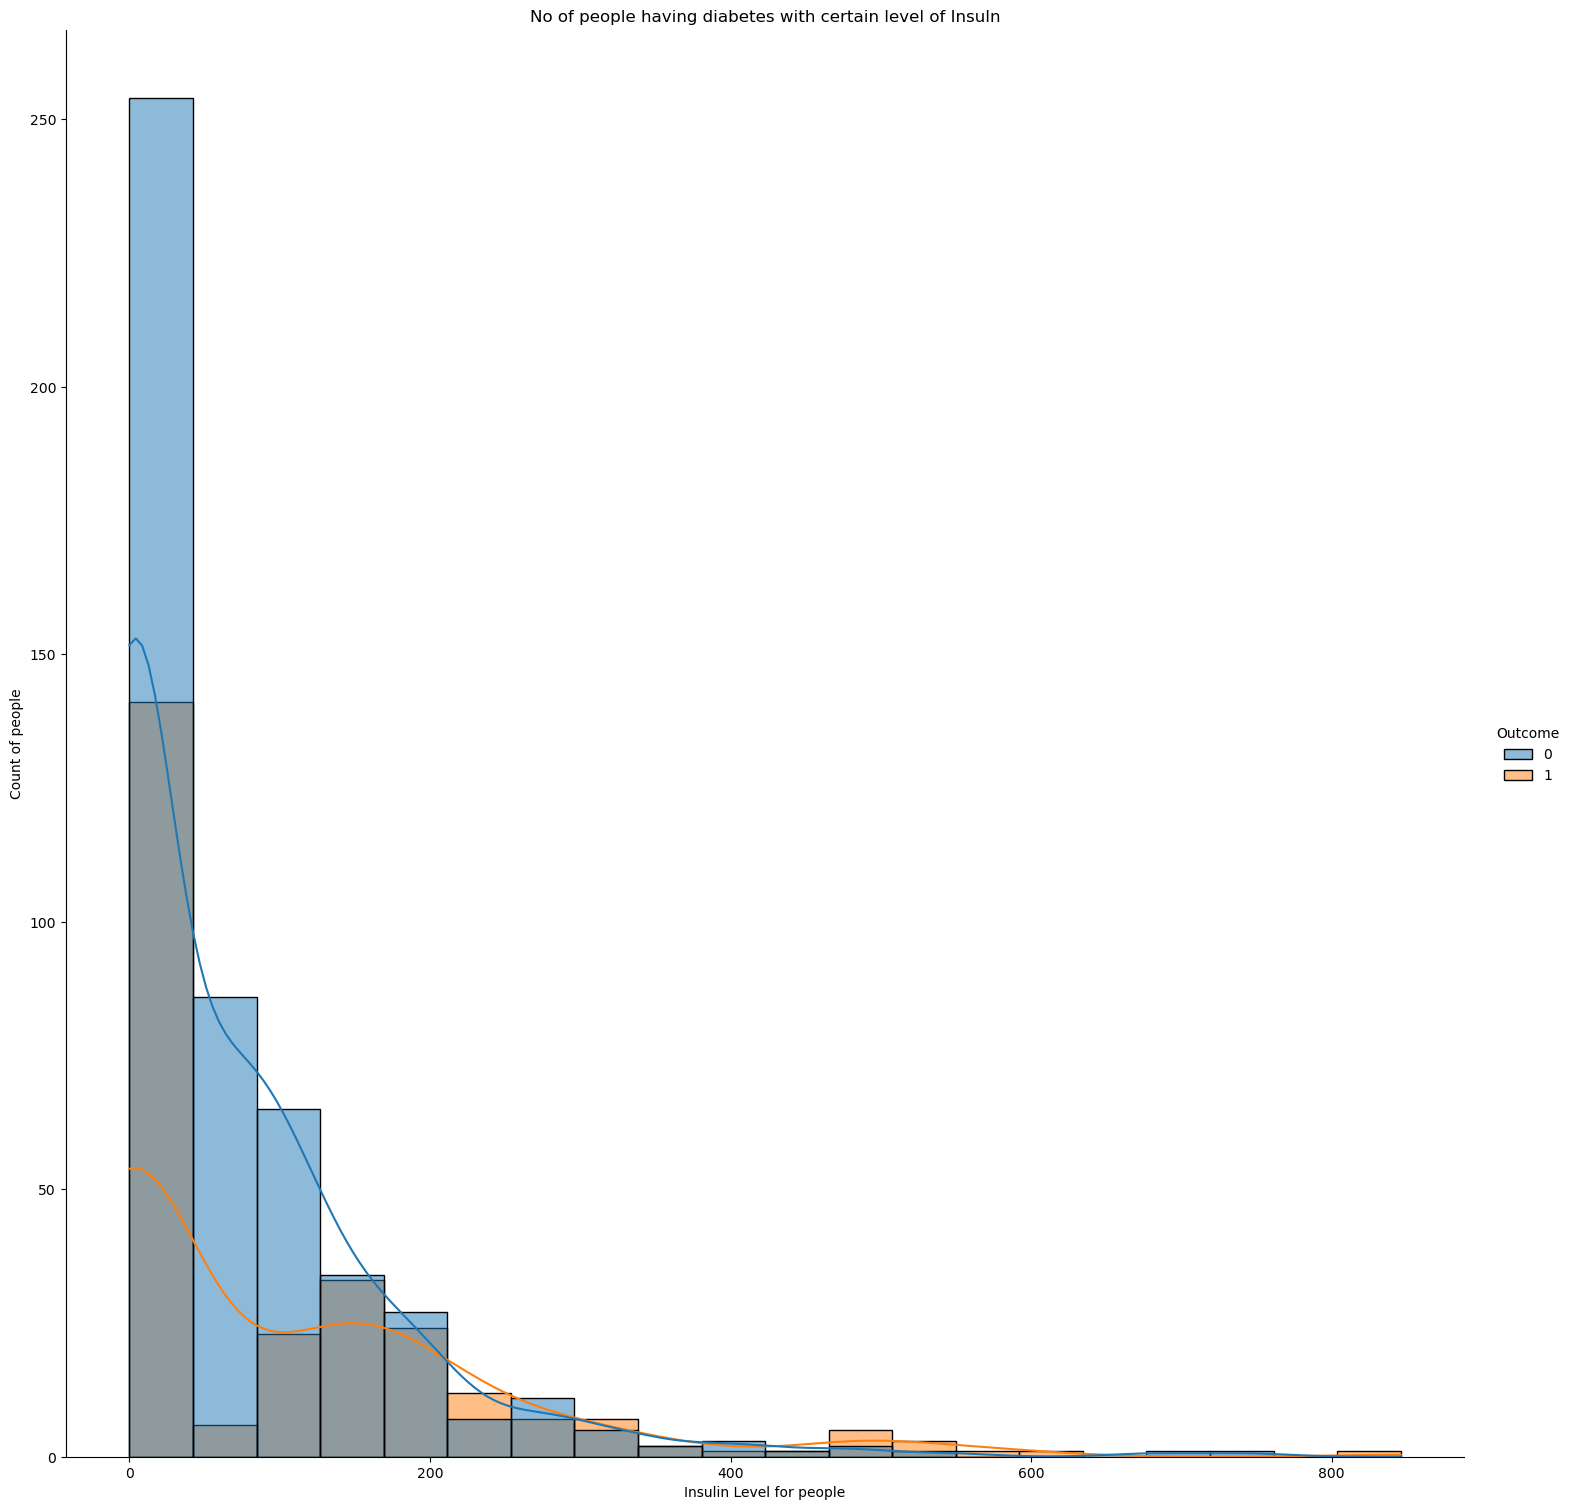

In [100]:
plt.figure(figsize=(12,8))
sns.displot(x='Insulin',hue='Outcome',data=df,bins=20,height=15,kde=True)
plt.xlabel('Insulin Level for people')
plt.ylabel('Count of people')
plt.title('No of people having diabetes with certain level of Insuln')
plt.show()

<Figure size 1200x600 with 0 Axes>

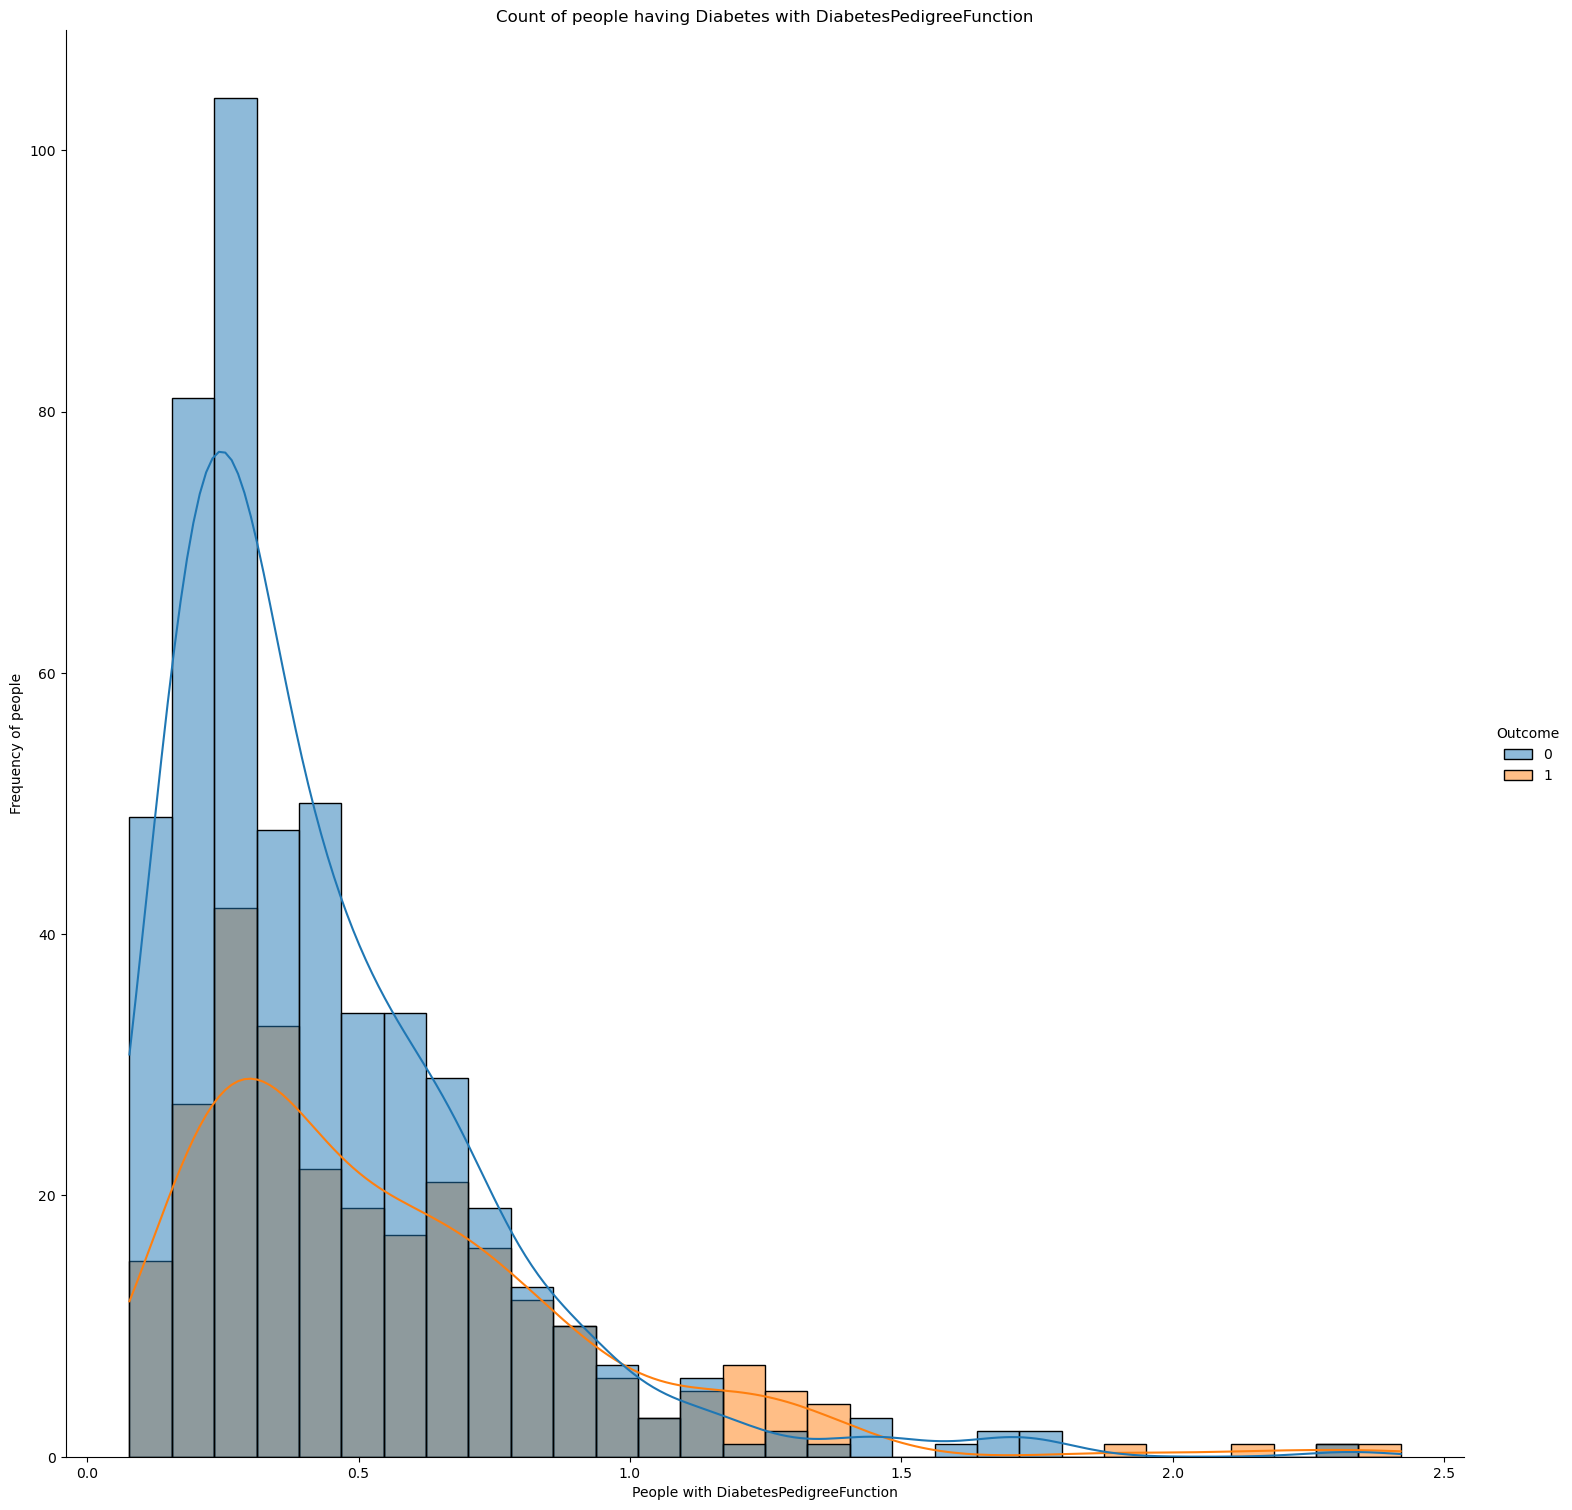

In [101]:
plt.figure(figsize=(12,6))
sns.displot(x = 'DiabetesPedigreeFunction', hue='Outcome', data=df, bins=30,height=15,kde=True)
plt.xlabel('People with DiabetesPedigreeFunction')
plt.ylabel('Frequency of people')
plt.title('Count of people having Diabetes with DiabetesPedigreeFunction')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x800 with 0 Axes>

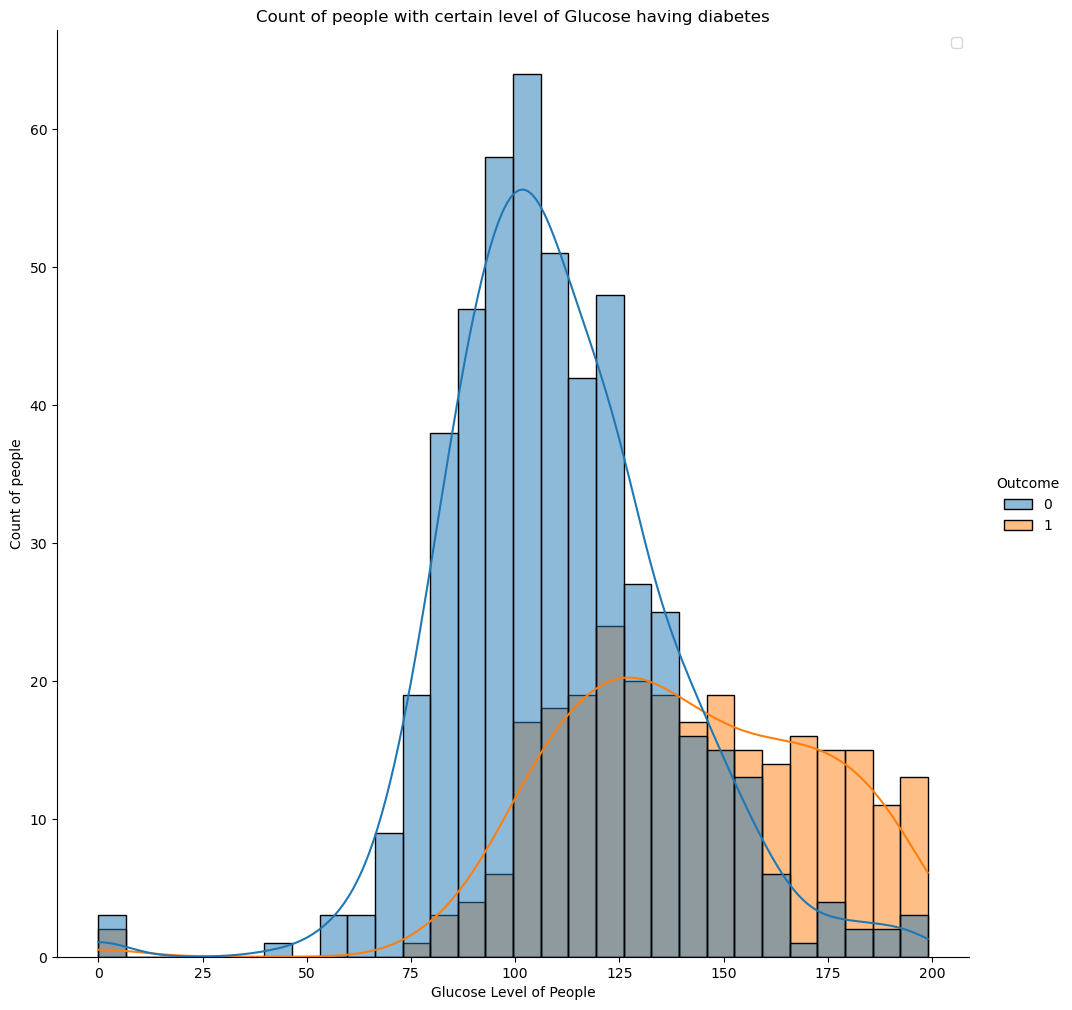

In [102]:
plt.figure(figsize=(12,8))
sns.displot(x='Glucose',hue='Outcome',bins = 30, kde = True, height = 10,data=df)
plt.xlabel('Glucose Level of People')
plt.ylabel('Count of people')
plt.title('Count of people with certain level of Glucose having diabetes')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

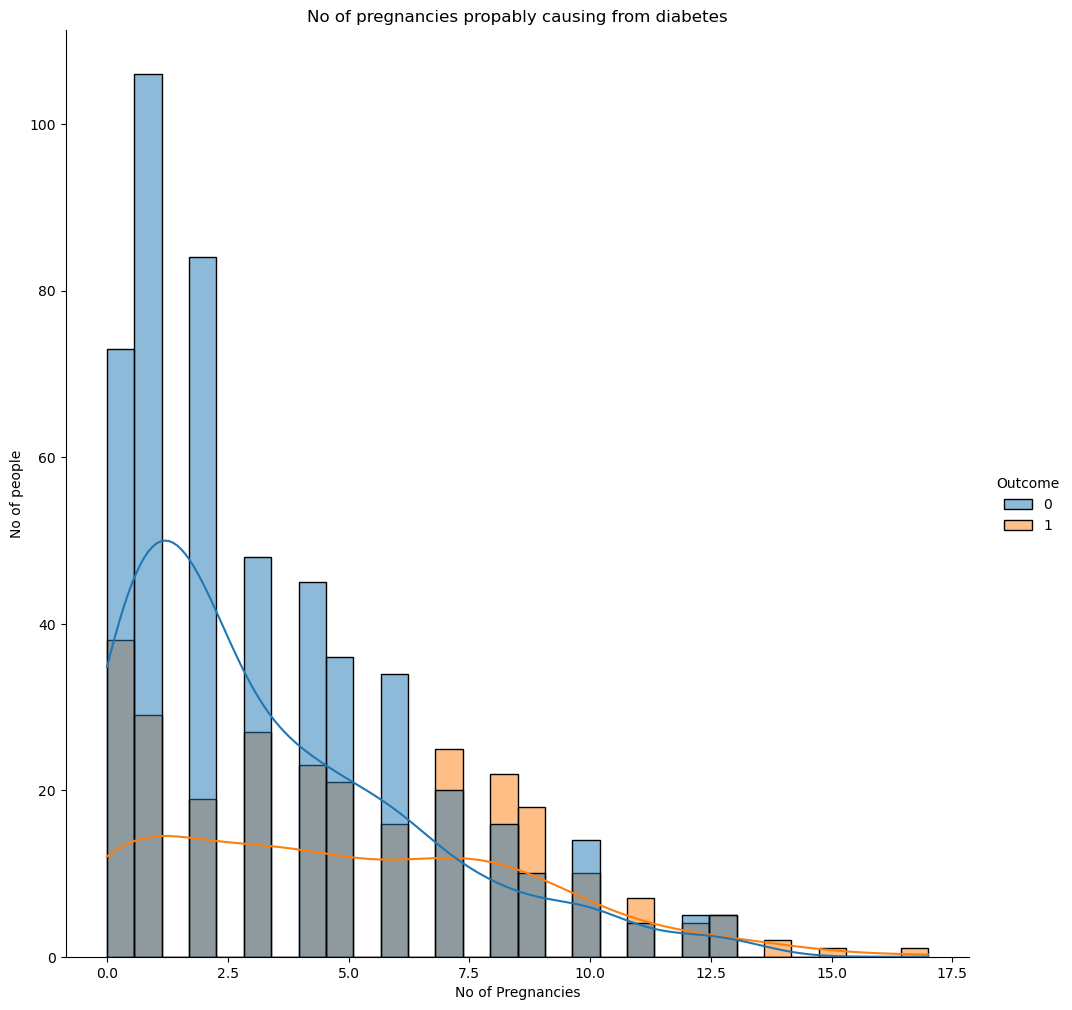

In [103]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='Pregnancies',hue='Outcome',bins=30,height=10,kde=True)
plt.xlabel('No of Pregnancies')
plt.ylabel('No of people')
plt.title('No of pregnancies propably causing from diabetes')
plt.show()

<Figure size 1200x800 with 0 Axes>

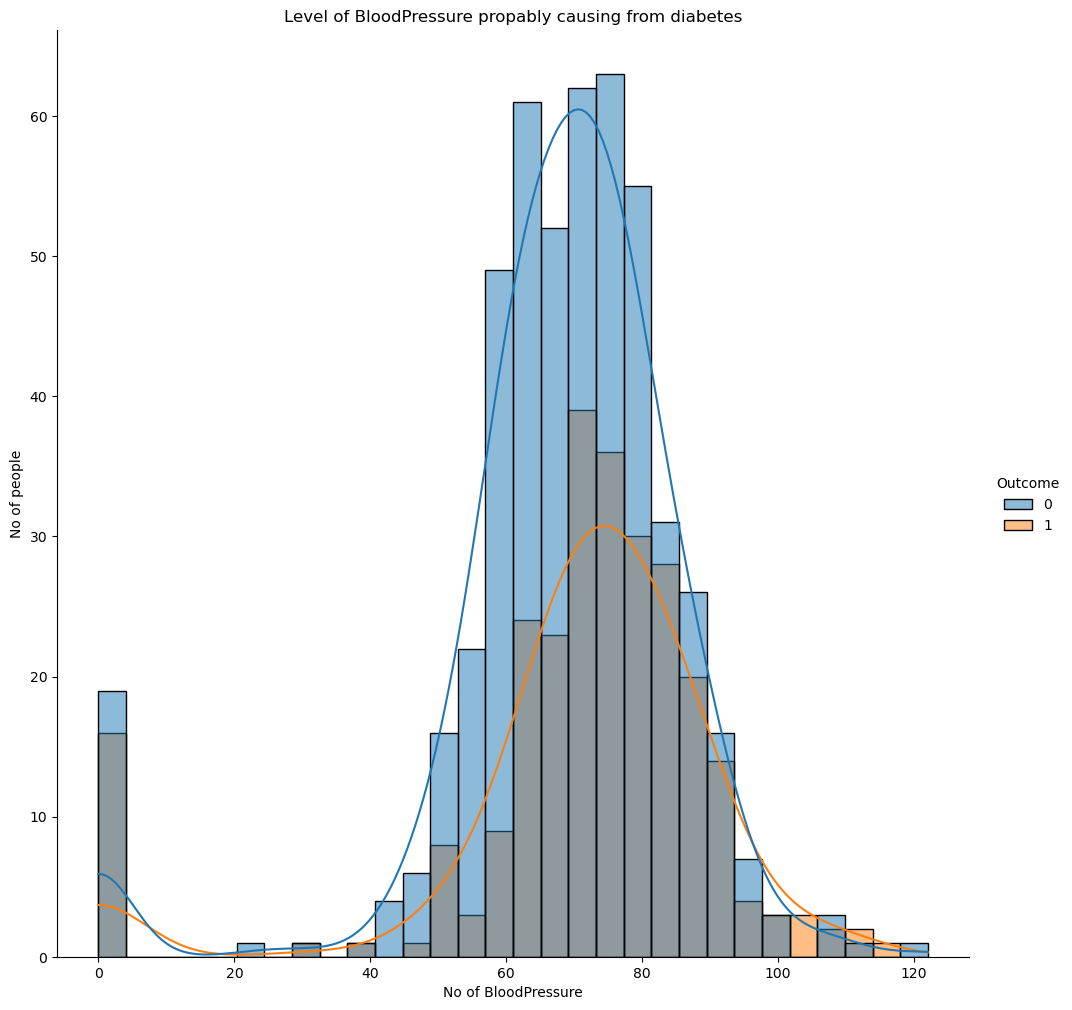

In [104]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='BloodPressure',hue='Outcome',bins=30,height=10,kde=True)
plt.xlabel('No of BloodPressure')
plt.ylabel('No of people')
plt.title('Level of BloodPressure propably causing from diabetes')
plt.show()

### 3.Multivariate Analysis

In [106]:
df['Glucose_bin']=pd.cut(df['Glucose'],bins=10)
df['Insulin_bin']=pd.cut(df['Insulin'],bins=10)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_bin,Insulin_bin
0,6,148,72,35,0,33.6,0.627,50,1,"(139.3, 159.2]","(-0.846, 84.6]"
1,1,85,66,29,0,26.6,0.351,31,0,"(79.6, 99.5]","(-0.846, 84.6]"
2,8,183,64,0,0,23.3,0.672,32,1,"(179.1, 199.0]","(-0.846, 84.6]"
3,1,89,66,23,94,28.1,0.167,21,0,"(79.6, 99.5]","(84.6, 169.2]"
4,0,137,40,35,168,43.1,2.288,33,1,"(119.4, 139.3]","(84.6, 169.2]"
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,"(99.5, 119.4]","(169.2, 253.8]"
764,2,122,70,27,0,36.8,0.340,27,0,"(119.4, 139.3]","(-0.846, 84.6]"
765,5,121,72,23,112,26.2,0.245,30,0,"(119.4, 139.3]","(84.6, 169.2]"
766,1,126,60,0,0,30.1,0.349,47,1,"(119.4, 139.3]","(-0.846, 84.6]"


In [107]:
pivot = df.pivot_table(values='Age',index='Glucose_bin',columns='Insulin_bin',aggfunc='mean')
pivot

C:\Users\91809\AppData\Local\Temp\ipykernel_31248\1825313197.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Age',index='Glucose_bin',columns='Insulin_bin',aggfunc='mean')


Insulin_bin,"(-0.846, 84.6]","(84.6, 169.2]","(169.2, 253.8]","(253.8, 338.4]","(338.4, 423.0]","(423.0, 507.6]","(507.6, 592.2]","(592.2, 676.8]","(676.8, 761.4]","(761.4, 846.0]"
Glucose_bin,,,,,,,,,,
"(-0.199, 19.9]",28.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(39.8, 59.7]",41.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(59.7, 79.6]",29.870968,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(79.6, 99.5]",29.063492,25.500000,37.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
"(99.5, 119.4]",32.692857,27.702128,34.150000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
"(119.4, 139.3]",37.651163,32.133333,27.454545,30.200000,33.666667,21.000000,NaN,52.0,NaN,NaN
"(139.3, 159.2]",39.022222,37.700000,37.727273,34.300000,31.666667,35.500000,29.5,NaN,NaN,NaN
"(159.2, 179.1]",40.925926,34.692308,40.571429,45.500000,NaN,22.666667,28.0,NaN,23.0,NaN
"(179.1, 199.0]",40.130435,41.333333,38.000000,34.666667,29.000000,60.000000,39.5,NaN,31.0,59.0


<function matplotlib.pyplot.show(close=None, block=None)>

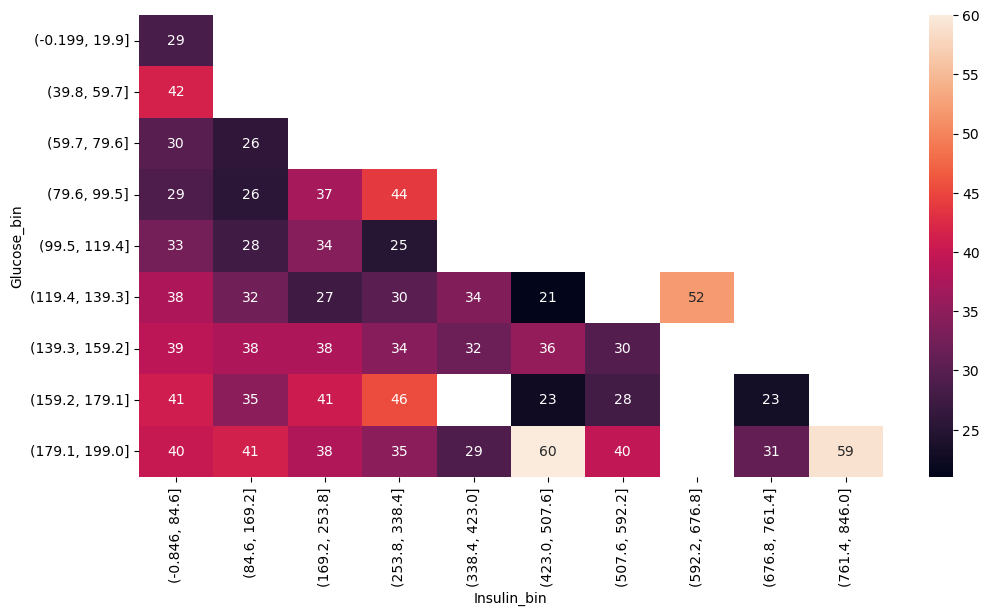

In [108]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot,annot = True)
plt.show

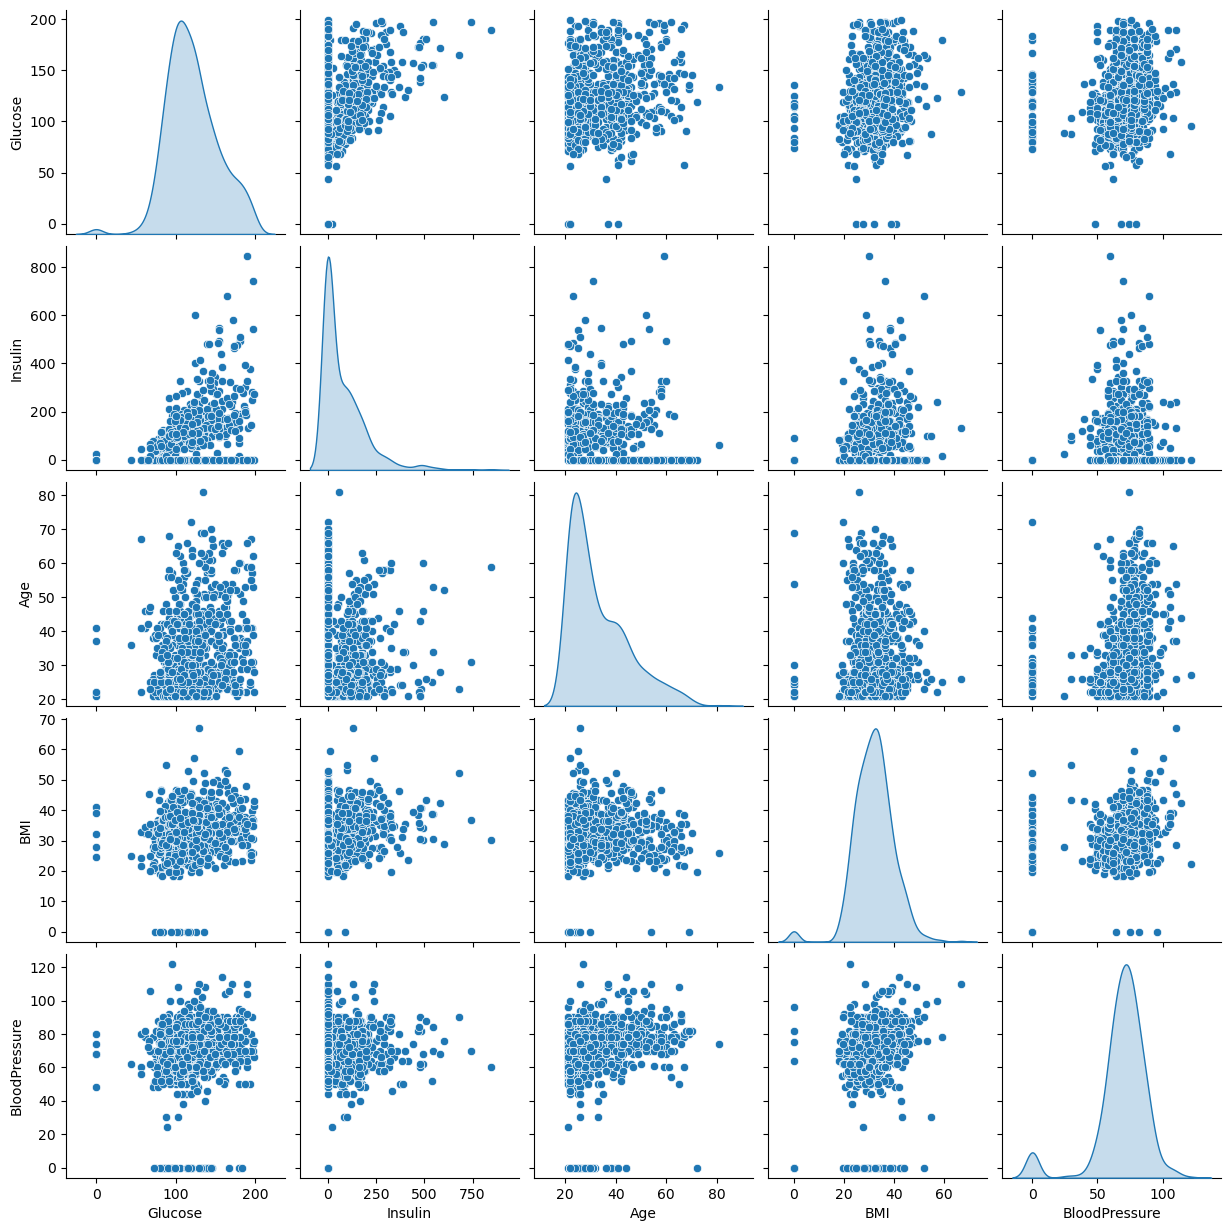

In [109]:
sns.pairplot(df[['Glucose','Insulin','Age','BMI','BloodPressure']],diag_kind='kde')
plt.show()

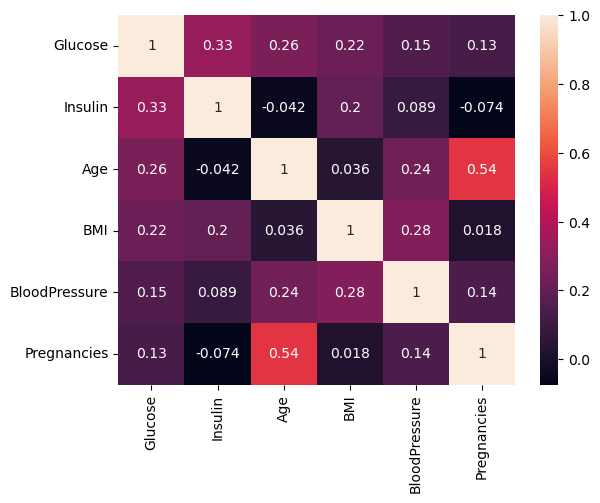

In [110]:
sns.heatmap(df[['Glucose','Insulin','Age','BMI','BloodPressure','Pregnancies']].corr(),annot=True)
plt.show()

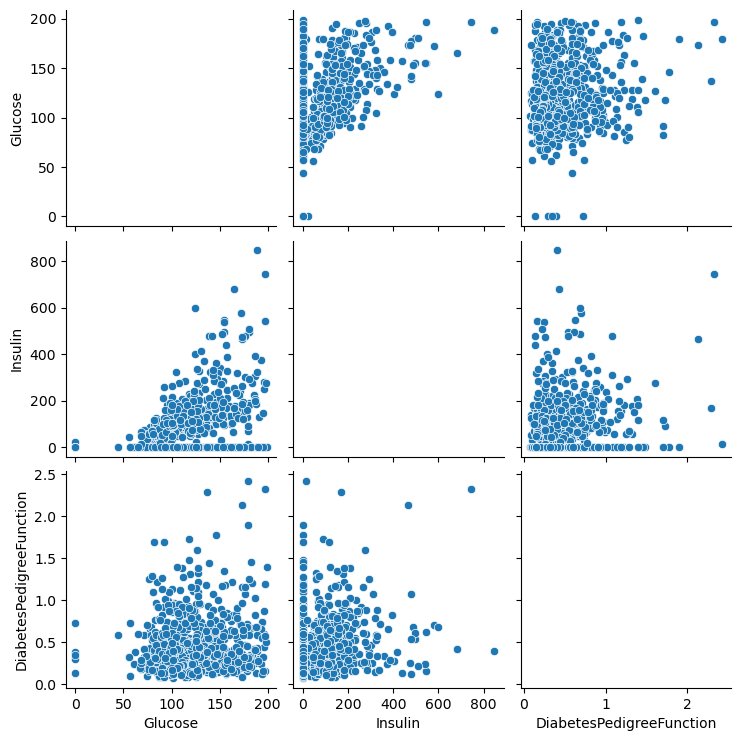

In [111]:
sns.pairplot(df[['Glucose','Insulin','DiabetesPedigreeFunction']],diag_kind=True)
plt.show()

In [112]:
df['BloodPressure_bin']=pd.cut(df['BloodPressure'],bins=10)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_bin,Insulin_bin,BloodPressure_bin
0,6,148,72,35,0,33.6,0.627,50,1,"(139.3, 159.2]","(-0.846, 84.6]","(61.0, 73.2]"
1,1,85,66,29,0,26.6,0.351,31,0,"(79.6, 99.5]","(-0.846, 84.6]","(61.0, 73.2]"
2,8,183,64,0,0,23.3,0.672,32,1,"(179.1, 199.0]","(-0.846, 84.6]","(61.0, 73.2]"
3,1,89,66,23,94,28.1,0.167,21,0,"(79.6, 99.5]","(84.6, 169.2]","(61.0, 73.2]"
4,0,137,40,35,168,43.1,2.288,33,1,"(119.4, 139.3]","(84.6, 169.2]","(36.6, 48.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,"(99.5, 119.4]","(169.2, 253.8]","(73.2, 85.4]"
764,2,122,70,27,0,36.8,0.340,27,0,"(119.4, 139.3]","(-0.846, 84.6]","(61.0, 73.2]"
765,5,121,72,23,112,26.2,0.245,30,0,"(119.4, 139.3]","(84.6, 169.2]","(61.0, 73.2]"
766,1,126,60,0,0,30.1,0.349,47,1,"(119.4, 139.3]","(-0.846, 84.6]","(48.8, 61.0]"


In [113]:
pivottable = df.pivot_table(values='Age',index = 'BloodPressure_bin',columns ='Glucose_bin',aggfunc='mean')
print(pivottable)


Glucose_bin        (-0.199, 19.9]  (39.8, 59.7]  (59.7, 79.6]  (79.6, 99.5]  \
BloodPressure_bin                                                             
(-0.122, 12.2]                NaN           NaN     23.500000     25.333333   
(12.2, 24.4]                  NaN           NaN           NaN     21.000000   
(24.4, 36.6]                  NaN           NaN           NaN     26.000000   
(36.6, 48.8]                 22.0           NaN     23.500000           NaN   
(48.8, 61.0]                  NaN          44.5     26.285714     25.272727   
(61.0, 73.2]                 31.5          36.0     29.700000     28.015625   
(73.2, 85.4]                 29.0          41.0     34.333333     33.400000   
(85.4, 97.6]                  NaN           NaN     21.000000     30.000000   
(97.6, 109.8]                 NaN           NaN     47.000000     35.000000   
(109.8, 122.0]                NaN           NaN           NaN     27.000000   

Glucose_bin        (99.5, 119.4]  (119.4, 139.3]  (

C:\Users\91809\AppData\Local\Temp\ipykernel_31248\55891010.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivottable = df.pivot_table(values='Age',index = 'BloodPressure_bin',columns ='Glucose_bin',aggfunc='mean')


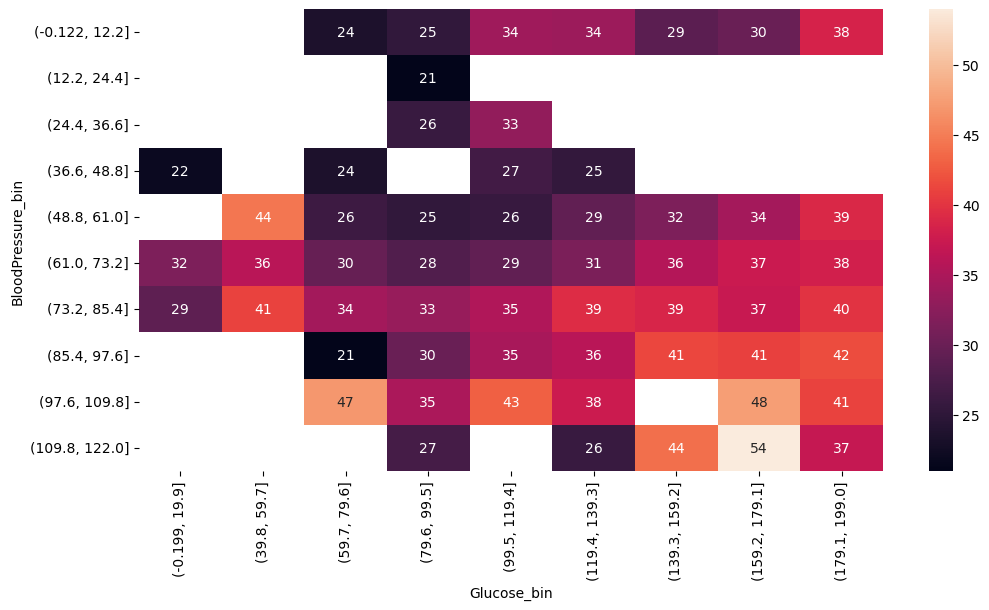

In [114]:
plt.figure(figsize=(12,6))
sns.heatmap(pivottable,annot=True)
plt.show()

In [115]:
df['DiabetesPedigreeFunction_bin'] = pd.cut(df['DiabetesPedigreeFunction'],bins=10)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_bin,Insulin_bin,BloodPressure_bin,DiabetesPedigreeFunction_bin
0,6,148,72,35,0,33.6,0.627,50,1,"(139.3, 159.2]","(-0.846, 84.6]","(61.0, 73.2]","(0.546, 0.781]"
1,1,85,66,29,0,26.6,0.351,31,0,"(79.6, 99.5]","(-0.846, 84.6]","(61.0, 73.2]","(0.312, 0.546]"
2,8,183,64,0,0,23.3,0.672,32,1,"(179.1, 199.0]","(-0.846, 84.6]","(61.0, 73.2]","(0.546, 0.781]"
3,1,89,66,23,94,28.1,0.167,21,0,"(79.6, 99.5]","(84.6, 169.2]","(61.0, 73.2]","(0.0757, 0.312]"
4,0,137,40,35,168,43.1,2.288,33,1,"(119.4, 139.3]","(84.6, 169.2]","(36.6, 48.8]","(2.186, 2.42]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,"(99.5, 119.4]","(169.2, 253.8]","(73.2, 85.4]","(0.0757, 0.312]"
764,2,122,70,27,0,36.8,0.340,27,0,"(119.4, 139.3]","(-0.846, 84.6]","(61.0, 73.2]","(0.312, 0.546]"
765,5,121,72,23,112,26.2,0.245,30,0,"(119.4, 139.3]","(84.6, 169.2]","(61.0, 73.2]","(0.0757, 0.312]"
766,1,126,60,0,0,30.1,0.349,47,1,"(119.4, 139.3]","(-0.846, 84.6]","(48.8, 61.0]","(0.312, 0.546]"


In [116]:
pivot_table = df.pivot_table(values='Age', index = 'DiabetesPedigreeFunction_bin',columns='Glucose_bin',aggfunc='mean')
pivot_table

C:\Users\91809\AppData\Local\Temp\ipykernel_31248\2446117339.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Age', index = 'DiabetesPedigreeFunction_bin',columns='Glucose_bin',aggfunc='mean')


Glucose_bin,"(-0.199, 19.9]","(39.8, 59.7]","(59.7, 79.6]","(79.6, 99.5]","(99.5, 119.4]","(119.4, 139.3]","(139.3, 159.2]","(159.2, 179.1]","(179.1, 199.0]"
DiabetesPedigreeFunction_bin,,,,,,,,,
"(0.0757, 0.312]",21.5,41.0,32.437500,27.784615,31.163265,35.362319,39.114286,42.947368,41.230769
"(0.312, 0.546]",29.5,22.0,26.222222,28.500000,30.061224,32.133333,36.384615,34.333333,37.818182
"(0.546, 0.781]",41.0,51.5,28.833333,28.961538,31.156250,38.615385,36.047619,35.363636,43.818182
"(0.781, 1.015]",NaN,NaN,NaN,36.375000,34.043478,28.818182,36.750000,38.666667,31.500000
"(1.015, 1.249]",NaN,NaN,NaN,31.400000,38.333333,33.285714,34.333333,41.000000,47.000000
"(1.249, 1.483]",NaN,NaN,24.000000,26.000000,43.800000,38.333333,51.000000,NaN,29.666667
"(1.483, 1.717]",NaN,NaN,NaN,26.500000,NaN,25.000000,NaN,NaN,NaN
"(1.717, 1.952]",NaN,NaN,NaN,NaN,21.000000,NaN,44.000000,NaN,25.000000
"(1.952, 2.186]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN


<Axes: xlabel='Glucose_bin', ylabel='DiabetesPedigreeFunction_bin'>

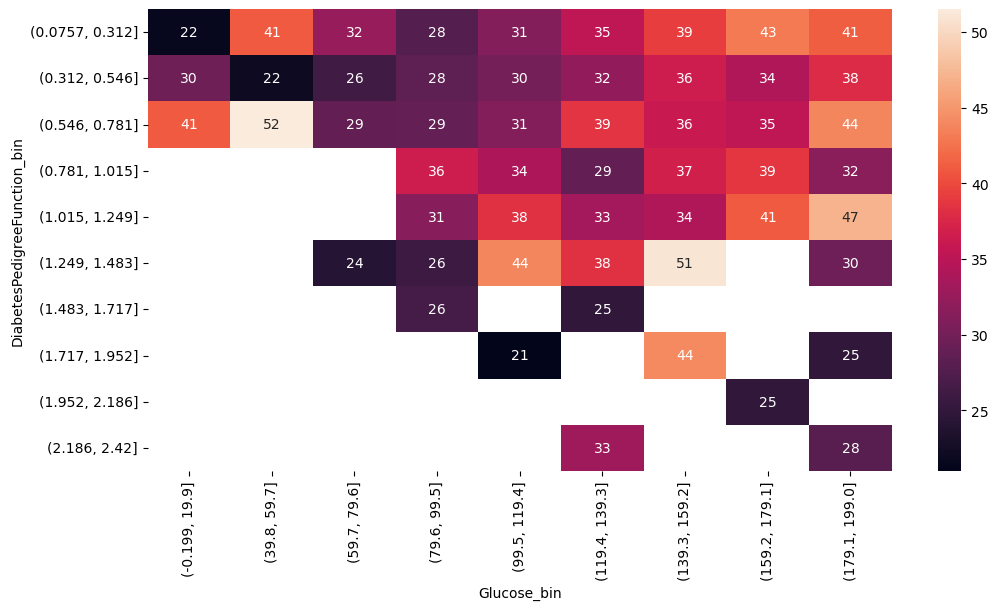

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,annot = True)

### 4. Feature Selection and Modelling

In [119]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_bin,Insulin_bin,BloodPressure_bin,DiabetesPedigreeFunction_bin
0,6,148,72,35,0,33.6,0.627,50,1,"(139.3, 159.2]","(-0.846, 84.6]","(61.0, 73.2]","(0.546, 0.781]"
1,1,85,66,29,0,26.6,0.351,31,0,"(79.6, 99.5]","(-0.846, 84.6]","(61.0, 73.2]","(0.312, 0.546]"
2,8,183,64,0,0,23.3,0.672,32,1,"(179.1, 199.0]","(-0.846, 84.6]","(61.0, 73.2]","(0.546, 0.781]"
3,1,89,66,23,94,28.1,0.167,21,0,"(79.6, 99.5]","(84.6, 169.2]","(61.0, 73.2]","(0.0757, 0.312]"
4,0,137,40,35,168,43.1,2.288,33,1,"(119.4, 139.3]","(84.6, 169.2]","(36.6, 48.8]","(2.186, 2.42]"


### Decision Tree Classififer

In [121]:
X = df.drop(columns=['BMI','Outcome','Glucose_bin','Insulin_bin','DiabetesPedigreeFunction_bin','SkinThickness','BloodPressure_bin'])
y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)




In [122]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accur = accuracy_score(y_test,y_predict)
precscore = precision_score(y_test,y_predict)
recscore = recall_score(y_test,y_predict)
print(f'Decision Tree Classifier : Accuracy Score :{accur}, Precision Score:{precscore},Recall Score:{recscore}')

Decision Tree Classifier : Accuracy Score :0.7142857142857143, Precision Score:0.5964912280701754,Recall Score:0.6181818181818182


#### Confusion Matrix

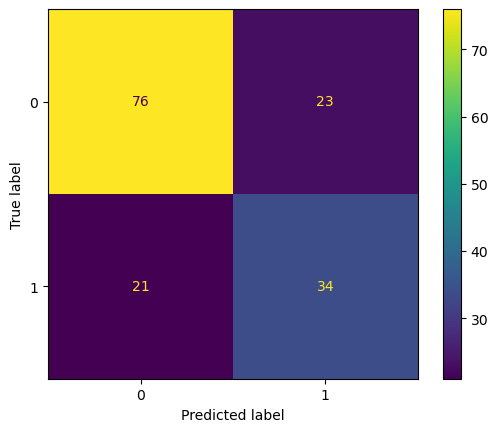

In [124]:
cm = confusion_matrix(y_test,y_predict)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [125]:

model_reg = RandomForestClassifier()
model_reg.fit(X_train,y_train)
y_predict_reg = model_reg.predict(X_test)
acc = accuracy_score(y_test,y_predict_reg)
pre = precision_score(y_test,y_predict)
rec = recall_score(y_test,y_predict)
print(f'Random forest Classifier Metrics: Accuracy Score:{acc},Precision Score:{pre},Recall Score:{rec}')

Random forest Classifier Metrics: Accuracy Score:0.7532467532467533,Precision Score:0.5964912280701754,Recall Score:0.6181818181818182


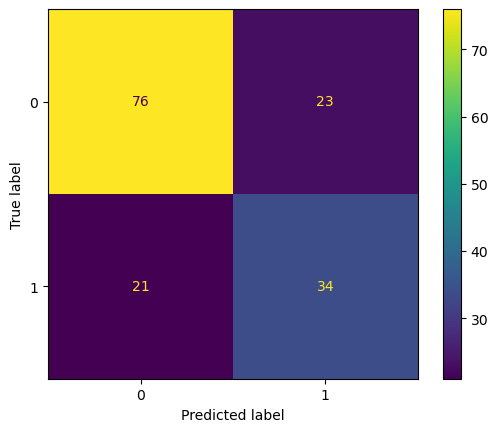

In [126]:
cm = confusion_matrix(y_test,y_predict)
display1 = ConfusionMatrixDisplay(confusion_matrix = cm)
display1.plot()

### XGBoost Classifier

In [165]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
acc = accuracy_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
prec=precision_score(y_test,y_predict)
print(f'XGBoost Metrics Accuracy Score:{acc},Recall Score:{recall},Precision Score:{prec}')

XGBoost Metrics Accuracy Score:0.6883116883116883,Recall Score:0.6181818181818182,Precision Score:0.5573770491803278


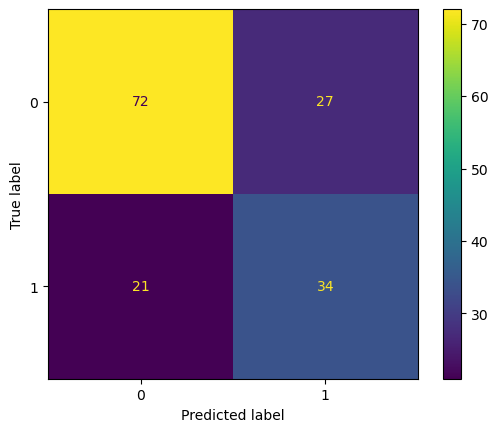

In [167]:
cm = confusion_matrix(y_test,y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

### ADABoost Classifier

In [187]:
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
acc = accuracy_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
prec=precision_score(y_test,y_predict)
print(f'AdaBoost Metrics Accuracy Score:{acc},Recall Score:{recall},Precision Score:{prec}')


AdaBoost Metrics Accuracy Score:0.7467532467532467,Recall Score:0.6363636363636364,Precision Score:0.6481481481481481


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


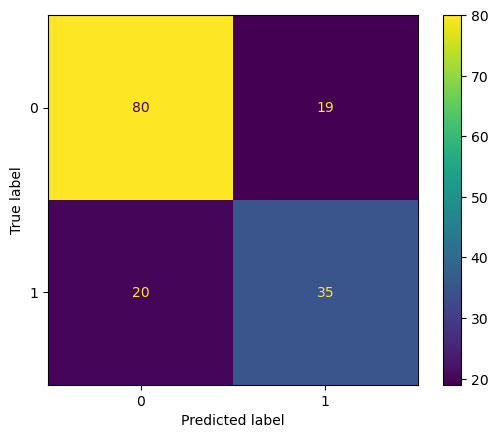

In [189]:
cm = confusion_matrix(y_test,y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()